# Practica Unidad 3 Club de préstamos LendingClub

## Nevarez García Litzy Yulissa 19040372

## Contexto de la practica

LendingClub es una compañía estadounidense de préstamos entre pares, con sede en San
Francisco, California. Es la plataforma de préstamos peer-to-peer más grande del mundo.

**LendingClub**

- permite a los prestatarios solicitar préstamos personales no garantizados entre 1,000 y 40,000.
- Los inversionistas pueden buscar y explorar las listas de préstamos en el sitio web de LendingClub y seleccionar los préstamos en los que desean invertir según la información proporcionada sobre el prestatario, el monto del préstamo, el grado del préstamo y el propósito del préstamo, con una inversión mínima de 25 dolares.
- Los inversionistas ganan dinero con los intereses.
- LendingClub gana dinero cobrando a los prestatarios una tarifa de originación y a los inversionistas una tarifa de servicio.


El archivo de datos **lending_club_2007_2011_6_states.csv** contiene la información del préstamo y
del prestatario para los préstamos iniciados entre 2007 y 2011 en seis estados, California, Nueva
York, Florida, Texas, Nueva Jersey e Illinois.

El archivo de diccionario de datos **data_dictionary.csv** contiene descripciones de todas las columnas
del archivo de datos.

**En cada punto se debe explicar el resultado obtenido**

## PASO 1. Realizar lo siguiente

• Verificar la información básica del DataFrame

• Verificar los valores nulos de cada columna

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = 'C:/Users/yulis/Analitica de los Datos en las organizaciones/lending_club_2007_2011_6_states.csv'
datosClub = pd.read_csv(path)
datosClub.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date
0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN
1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN
2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,...,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN
3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,...,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN
4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,...,Individual,0,0.0,0,0.0,0.0,N,Cash,N,NaN


In [4]:
#mostramos la información
datosClub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19908 entries, 0 to 19907
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    19908 non-null  int64  
 1   funded_amnt                  19908 non-null  int64  
 2   funded_amnt_inv              19908 non-null  float64
 3   term                         19908 non-null  object 
 4   int_rate                     19908 non-null  float64
 5   installment                  19908 non-null  float64
 6   grade                        19908 non-null  object 
 7   sub_grade                    19908 non-null  object 
 8   emp_title                    18723 non-null  object 
 9   emp_length                   19409 non-null  object 
 10  home_ownership               19908 non-null  object 
 11  annual_inc                   19908 non-null  int64  
 12  verification_status          19908 non-null  object 
 13  issue_d         

In [5]:
#Mostramos los datos vacios, primero hacemos un frame con los datos nulos y despues un ciclo para mostrarlos
valores_perdidos = datosClub.isnull()
#valores_perdidos.head(5)
for columna in valores_perdidos.columns.values.tolist(): 
    print(columna)
    print(valores_perdidos[columna].value_counts())
    print("")

loan_amnt
False    19908
Name: loan_amnt, dtype: int64

funded_amnt
False    19908
Name: funded_amnt, dtype: int64

funded_amnt_inv
False    19908
Name: funded_amnt_inv, dtype: int64

term
False    19908
Name: term, dtype: int64

int_rate
False    19908
Name: int_rate, dtype: int64

installment
False    19908
Name: installment, dtype: int64

grade
False    19908
Name: grade, dtype: int64

sub_grade
False    19908
Name: sub_grade, dtype: int64

emp_title
False    18723
True      1185
Name: emp_title, dtype: int64

emp_length
False    19409
True       499
Name: emp_length, dtype: int64

home_ownership
False    19908
Name: home_ownership, dtype: int64

annual_inc
False    19908
Name: annual_inc, dtype: int64

verification_status
False    19908
Name: verification_status, dtype: int64

issue_d
False    19908
Name: issue_d, dtype: int64

loan_status
False    19908
Name: loan_status, dtype: int64

pymnt_plan
False    19908
Name: pymnt_plan, dtype: int64

purpose
False    19908
Name: purpose, 

## Paso 2. Realizar un Análisis Exploratorio de los Datos - EDA

EDA es un enfoque para analizar conjuntos de datos para **resumir sus características principales**, a menudo con visualizaciones.

Para variables **categóricas**, podemos verificar:

- Valores únicos en la categoría.
- Recuento de cada categoría.
- Agregación de otras características continuas para cada categoría.

Para variables **continuas**, podemos verificar:

- Distribuciones
- Correlaciones de múltiples características

### 2.1 Explorar Plazo del préstamo
Explorar la característica del plazo del préstamo

1. Mostrar los valores únicos en la columna plazo
2. Contar los valores de los diferentes plazos del crédito
3. Realizar una grafica de barras que compare los plazos del crédito

In [6]:
# 1. Usamos el metodo unique para sacar los valores unicos de la columna plazo
datosClub["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [7]:
# 2. Utilizamos la funcion counts para contar los valores
datosClub["term"].value_counts()

36 months    14852
60 months     5056
Name: term, dtype: int64

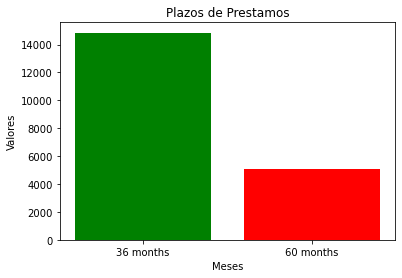

In [8]:
#3. Creamos la gráfica de barras
# Como eje X ponenos los meses
ejeX = datosClub["term"].unique()
# Como eje Y ponemos la cuenta
ejeY = datosClub["term"].value_counts().tolist()

plt.bar(ejeX, ejeY, color=['green','red'])

#Ponemos titulos y personalizamos
plt.title('Plazos de Prestamos')
ax = plt.subplot()
ax.set_xticks(ejeX)#Eje x
ax.set_xticklabels(ejeX)#Etiquetas del eje x
ax.set_xlabel('Meses')#Nombre del eje x
ax.set_ylabel('Valores')#Nombre del eje y

plt.show()
plt.close('all')

### 2.2 Explorar la Taza de interés

Explorar la característica de la tasa de interés

4. Calcular la tasa promedio por plazo

5. Graficar la tasa promedio 

6. Realizar un histograma sobre la columna int_rate para verificar la distribución de la tasa de interés


In [9]:
#4. Seleccionamos los valores de la columna int_rate y los agrupamos con la columna term para después sacar la media
datosClub["int_rate"].groupby(datosClub["term"]).mean()

term
36 months    11.121125
60 months    14.934955
Name: int_rate, dtype: float64

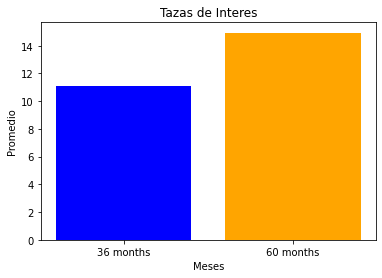

In [10]:
#5 Graficamos los datos anteriores
# Como eje X ponenos los meses
ejeX = datosClub["term"].unique()
# Como eje Y ponemos el promedio de la tasa de interes que calculamos
ejeY = datosClub["int_rate"].groupby(datosClub["term"]).mean().tolist()

plt.bar(ejeX, ejeY, color=['blue','orange'])

#Ponemos titulos y personalizamos
plt.title('Tazas de Interes')
ax = plt.subplot()
ax.set_xticks(ejeX)#Eje x
ax.set_xticklabels(ejeX)#Etiquetas del eje x
ax.set_xlabel('Meses')#Nombre del eje x
ax.set_ylabel('Promedio')#Nombre del eje y

plt.show()
plt.close('all')

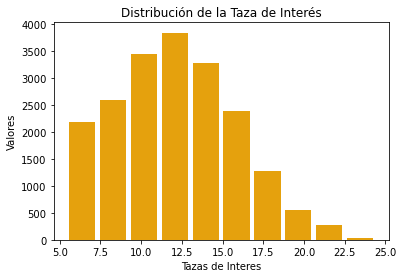

In [11]:
#6
#creamos un dataframe con los datos y los pasamos a una lista
tazaInteres = datosClub["int_rate"]
lista = tazaInteres.tolist()

#En el eje x van los valores, en el Y es el número de tiras del histograma, el color y el ancho
plt.hist(x=lista, bins=10, color='#E5A10D', rwidth=0.85)
plt.title('Distribución de la Taza de Interés')
plt.xlabel('Tazas de Interes')
plt.ylabel('Valores')

plt.show()

### 2.3 Explorar la calificación del préstamo

Lending Club **asigna una calificación crediticia (que mide la probabilidad de incumplimiento 
del préstamo) y la tasa de interés de su préstamo**. Las calificaciones de préstamos incluyen una 
letra (A - G)
La calificación **A1, la calificación de mayor calidad**, pueden esperar **tasas de interés bajas de 
alrededor de 5.99%** sobre el préstamo de 36 meses, mientras que aquellos con calificación G5 
pueden esperar tasas de 35.89% sobre el préstamo de 36 meses.


7. ¿Cuántas calificaciones de préstamo diferentes hay en el conjunto de datos?

In [12]:
#Cantidad de prestamos de las diferentes calificaciones
datosClub['sub_grade'].groupby(datosClub["grade"]).value_counts()

grade  sub_grade
A      A4           1424
       A5           1363
       A3            865
       A2            691
       A1            532
B      B3           1479
       B5           1386
       B4           1211
       B2           1070
       B1            919
C      C2           1096
       C1           1035
       C3            758
       C4            605
       C5            593
D      D2            697
       D3            597
       D4            514
       D1            495
       D5            445
E      E1            394
       E2            323
       E3            286
       E4            221
       E5            210
F      F1            154
       F2            124
       F3            105
       F4             94
       F5             63
G      G1             51
       G2             40
       G4             28
       G3             26
       G5             14
Name: sub_grade, dtype: int64

8. Graficar con barras los valores obtenidos

In [19]:
#datosClub['grade'].value_counts()
#datosClub['grade'].unique()

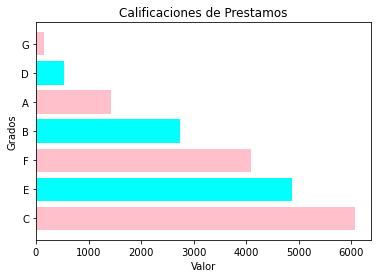

In [27]:
#Como eje Y pones las calificaciones de los prestamos
ejeY = datosClub["grade"].unique()
# Como eje X ponemos la cantidad total de las diferentes calificaciones de los prestamos
ejeX = datosClub["grade"].value_counts().tolist()
plt.barh(ejeY, ejeX, color=['pink','cyan']) 
  
plt.ylabel("Grados") 
plt.xlabel("Valor") 

plt.title("Calificaciones de Prestamos") 
plt.show() 

In [ ]:
#res = datosClub['grade'].groupby(datosClub["sub_grade"]).value_counts().tolist()
#sub_grados = datosClub["sub_grade"].unique().tolist()
#sub_grados.sort()
#grados = datosClub["grade"].unique().tolist()
#grados.sort()


### 2.4 Explorar los Préstamos por Estado


9. Contabilizar el numero de préstamos por estado

In [15]:
datosClub["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [16]:
#Vemos que hay dos tipos de estado, Fully Paid: 16965 prestamos y Charged Off: 2943 prestamos
datosClub["loan_status"].value_counts()

Fully Paid     16965
Charged Off     2943
Name: loan_status, dtype: int64

10. Graficar con barras horizontales los valores obtenido

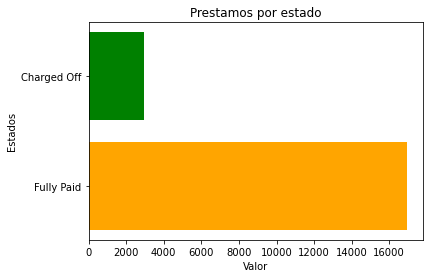

In [17]:
#Como eje Y pones los tipos de estado de un prestamo
ejeY = datosClub["loan_status"].unique()
# Como eje X ponemos la cantidad de prestamos
ejeX = datosClub["loan_status"].value_counts().tolist()
plt.barh(ejeY, ejeX, color=['orange','green']) 
  
plt.ylabel("Estados") 
plt.xlabel("Valor") 

plt.title("Prestamos por estado") 
plt.show() 
